In [624]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Estandarización
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats

# Encoding
# ==============================================================================
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Guardar modelo
# ==============================================================================
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [447]:
# Carga del csv
# ==============================================================================

df = pd.read_csv("datos/creditcardmarketing.csv", header= None)

In [448]:
# Vemos cómo se ve el DF
# ==============================================================================

df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0


In [449]:
# Almacenamos los nombres de las columnas del Readme en una lista, y la igualamos al df.columns
# ==============================================================================

col = ["Customer_Number","Offer_Accepted","Reward",
       "Mailer_Type","Income_Level","Bank_Accounts_Open",
       "Overdraft_Protection","Credit_Rating","Credit_Cards_Held",
       "Homes_Owned","Household_Size","Own_Your_Home","Average_Balance_Q1",
       "Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"]

df.columns = col

df.head(2)

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0


In [450]:
# Análisis exploratorio
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Average_Balance_Q1    17976 non-null  float64
 13  Average_Balance_Q2    17976 non-null  float64
 14  Average_Balance_Q3    17976 non-null  float64
 15  Average_Balance_Q4 

In [451]:
# Número de datos nulos por columna
# ==============================================================================

df.isnull().sum()

Customer_Number          0
Offer_Accepted           0
Reward                   0
Mailer_Type              0
Income_Level             0
Bank_Accounts_Open       0
Overdraft_Protection     0
Credit_Rating            0
Credit_Cards_Held        0
Homes_Owned              0
Household_Size           0
Own_Your_Home            0
Average_Balance_Q1      24
Average_Balance_Q2      24
Average_Balance_Q3      24
Average_Balance_Q4      24
Balance                 24
dtype: int64

In [452]:
# Número de datos duplicados
# ==============================================================================

df.duplicated().sum()

0

# 1- Tratamiento de valores nulos

In [453]:
# Nos hacemos una copia del dataframe
# ==============================================================================

df_med = df.copy()
df_it = df.copy()
df_knn = df.copy()

In [454]:
# En este caso trabajaremos con las columnas donde hay nulos
# ==============================================================================

columnas_nulas = ["Average_Balance_Q1","Average_Balance_Q2", "Average_Balance_Q3", "Average_Balance_Q4", "Balance"]

for column in columnas_nulas:
    df_med[column].replace(np.nan, df[column].median(), inplace=True)

In [455]:
# Creamos una instancia del método Iterative Imputer con las características que queremos, y lo aplicamos sobre nuestras variables numéricas
# ==============================================================================

imputer = IterativeImputer()
numericas = df_it.select_dtypes(include = np.number)
imputer.fit(numericas)

IterativeImputer()

In [456]:
# Transformamos nuestros datos, para que se reemplacen los valores nulos usando "transform", y convertimos el array que nos devuelve en un dataframe
# ==========================================================================================

imputer.transform(numericas)
df_iterative = pd.DataFrame(imputer.transform(numericas), columns = numericas.columns)
df_iterative.head(2)

,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1.0,1.0,2.0,1.0,4.0,1160.75,1669.0,877.0,1095.0,1002.0
1,2.0,1.0,2.0,2.0,5.0,147.25,39.0,106.0,78.0,366.0


In [457]:
# Creamos una instancia del método KNN Imputer con las características que queremos, y lo aplicamos sobre nuestras variables numéricas
# ==============================================================================

imputerKNN = KNNImputer(n_neighbors=5)
numericas = df_knn.select_dtypes(include = np.number)
imputerKNN.fit(numericas)

KNNImputer()

In [458]:
# Transformamos nuestros datos, para que se reemplacen los valores nulos usando "transform", y convertimos el array que nos devuelve en un dataframe
# ==========================================================================================

numericas_knn= imputerKNN.transform(numericas)
df_knn_imputer = pd.DataFrame(numericas_knn, columns = numericas.columns)
df_knn_imputer.head(2)

,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1.0,1.0,2.0,1.0,4.0,1160.75,1669.0,877.0,1095.0,1002.0
1,2.0,1.0,2.0,2.0,5.0,147.25,39.0,106.0,78.0,366.0


In [459]:
# Comprobamos nulos de nuevo
# ==============================================================================

df_med.isnull().sum()

Customer_Number         0
Offer_Accepted          0
Reward                  0
Mailer_Type             0
Income_Level            0
Bank_Accounts_Open      0
Overdraft_Protection    0
Credit_Rating           0
Credit_Cards_Held       0
Homes_Owned             0
Household_Size          0
Own_Your_Home           0
Average_Balance_Q1      0
Average_Balance_Q2      0
Average_Balance_Q3      0
Average_Balance_Q4      0
Balance                 0
dtype: int64

In [460]:
# Comprobamos nulos de nuevo
# ==============================================================================

df_iterative.isnull().sum()

Customer_Number       0
Bank_Accounts_Open    0
Credit_Cards_Held     0
Homes_Owned           0
Household_Size        0
Average_Balance_Q1    0
Average_Balance_Q2    0
Average_Balance_Q3    0
Average_Balance_Q4    0
Balance               0
dtype: int64

In [461]:
# Comprobamos nulos de nuevo
# ==============================================================================

df_knn_imputer.isnull().sum()

Customer_Number       0
Bank_Accounts_Open    0
Credit_Cards_Held     0
Homes_Owned           0
Household_Size        0
Average_Balance_Q1    0
Average_Balance_Q2    0
Average_Balance_Q3    0
Average_Balance_Q4    0
Balance               0
dtype: int64

In [462]:
# Chequeamos los valores del df original para comparar las diferentes resultados del tratamiento de nulos, para elegir el que tenga los datos más parecidos
# ==============================================================================

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Average_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Average_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Average_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Average_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [463]:
# Chequeamos los valores del df con la transformación de la mediana
# ==============================================================================

df_med.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.7500,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
Average_Balance_Q1,18000.0,940.604208,350.072621,48.25,787.9375,1007.0,1152.5625,3366.25
Average_Balance_Q2,18000.0,910.266056,619.684111,0.00,393.0000,772.0,1520.2500,3450.00
Average_Balance_Q3,18000.0,999.435667,457.098763,0.00,664.0000,1032.0,1342.0000,3421.00
Average_Balance_Q4,18000.0,1041.904889,553.094705,0.00,633.0000,945.5,1462.0000,3823.00
Balance,18000.0,810.042889,558.642246,0.00,363.7500,703.0,1211.0000,4215.00


In [464]:
# Chequeamos los valores del df con la transformación del Iterative Imputer
# ==============================================================================

df_iterative.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.7500,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
Average_Balance_Q1,18000.0,940.515562,350.064214,48.25,787.9375,1006.5,1152.5625,3366.25
Average_Balance_Q2,18000.0,910.450656,619.663515,0.00,393.0000,773.0,1520.2500,3450.00
Average_Balance_Q3,18000.0,999.392190,457.097214,0.00,664.0000,1032.0,1342.0000,3421.00
Average_Balance_Q4,18000.0,1042.033600,553.083487,0.00,633.0000,946.0,1462.0000,3823.00
Balance,18000.0,810.185803,558.628553,0.00,363.7500,704.0,1211.0000,4215.00


In [465]:
# Chequeamos los valores del df con la transformación del KNN Imputer
# ==============================================================================

df_knn_imputer.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.0000,9.00
Average_Balance_Q1,18000.0,940.601314,350.122111,48.25,787.75,1007.0,1153.0625,3366.25
Average_Balance_Q2,18000.0,910.541622,619.761598,0.00,393.00,772.5,1521.0000,3450.00
Average_Balance_Q3,18000.0,999.512189,457.168542,0.00,663.75,1032.0,1342.0000,3421.00
Average_Balance_Q4,18000.0,1042.117511,553.181268,0.00,633.00,946.0,1462.0000,3823.00
Balance,18000.0,810.233933,558.699106,0.00,363.75,703.0,1211.2500,4215.00


### Como los datos se parecen más a los datos originales, con el Iterative imputer, nos quedamos con éste método de reemplazar los nulos

In [466]:
# Almacenamos los objects de la copia del df y lo concatenamos con las numéricas que hemos tratado con el Iterative Imputer
# ==============================================================================

df_prueba= df_it.select_dtypes(include="object")

df = pd.concat([df_prueba, df_iterative], axis=1)
df.head(2)

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Overdraft_Protection,Credit_Rating,Own_Your_Home,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,No,Air Miles,Letter,High,No,High,No,1.0,1.0,2.0,1.0,4.0,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,No,Medium,Yes,2.0,1.0,2.0,2.0,5.0,147.25,39.0,106.0,78.0,366.0


# 2- Ánalisis Descriptivo

In [467]:
df["Offer_Accepted"].value_counts()

No     16977
Yes     1023
Name: Offer_Accepted, dtype: int64

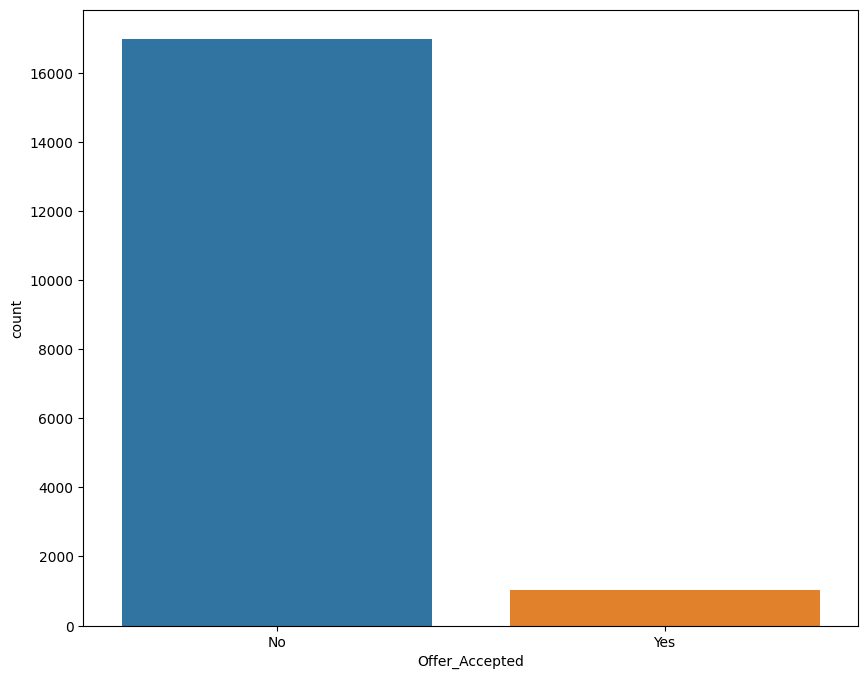

In [468]:
# Displot de Offer_Accepted para ver cómo se distribuyen los datos de nuestra variable predictora
# ==============================================================================

sns.countplot(data = df,
             x = "Offer_Accepted");

### Más adelante tendremos que balancear los datos, ya que hay mucha diferencia entre Si y No en nuestra Variable Respuesta

In [469]:
# Exploramos cuáles son los principales estadísticos de las variables respuesta
# ==============================================================================

df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.7500,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
Average_Balance_Q1,18000.0,940.515562,350.064214,48.25,787.9375,1006.5,1152.5625,3366.25
Average_Balance_Q2,18000.0,910.450656,619.663515,0.00,393.0000,773.0,1520.2500,3450.00
Average_Balance_Q3,18000.0,999.392190,457.097214,0.00,664.0000,1032.0,1342.0000,3421.00
Average_Balance_Q4,18000.0,1042.033600,553.083487,0.00,633.0000,946.0,1462.0000,3823.00
Balance,18000.0,810.185803,558.628553,0.00,363.7500,704.0,1211.0000,4215.00


In [470]:
# Exploramos cuáles son los principales estadísticos de las variables respuesta
# ==============================================================================

df.describe(include = "object").T

,count,unique,top,freq
Offer_Accepted,18000,2,No,16977
Reward,18000,3,Air Miles,6061
Mailer_Type,18000,2,Postcard,9147
Income_Level,18000,3,Medium,9013
Overdraft_Protection,18000,2,No,15322
Credit_Rating,18000,3,High,6071
Own_Your_Home,18000,2,Yes,11655


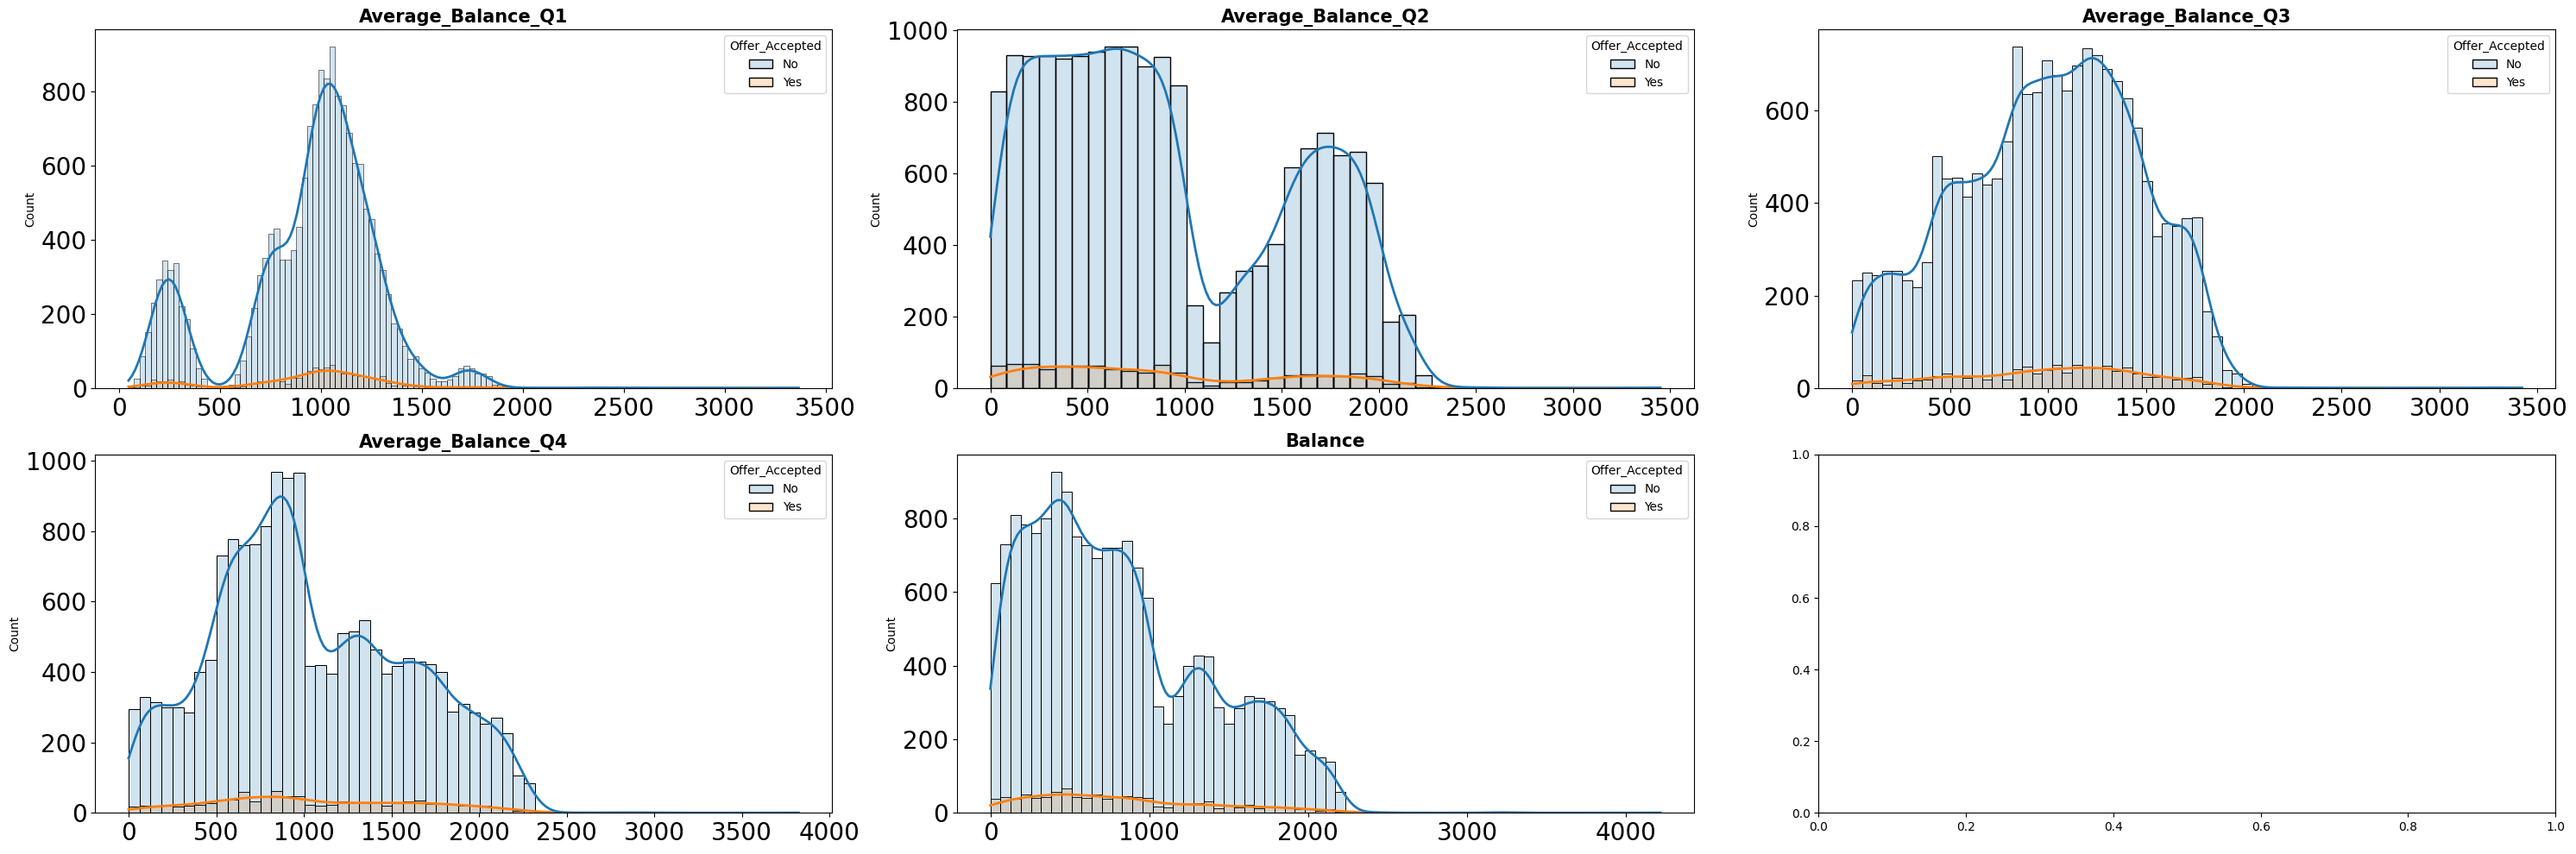

In [471]:
# Gráfico de distribución para cada variable numérica, con la distribución de los No y los Si
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.drop(["Customer_Number","Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data = columnas_numeric,
        hue = df["Offer_Accepted"],
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

### Vemos que los datos se ditribuyen de manera similar entre los Si y lo No

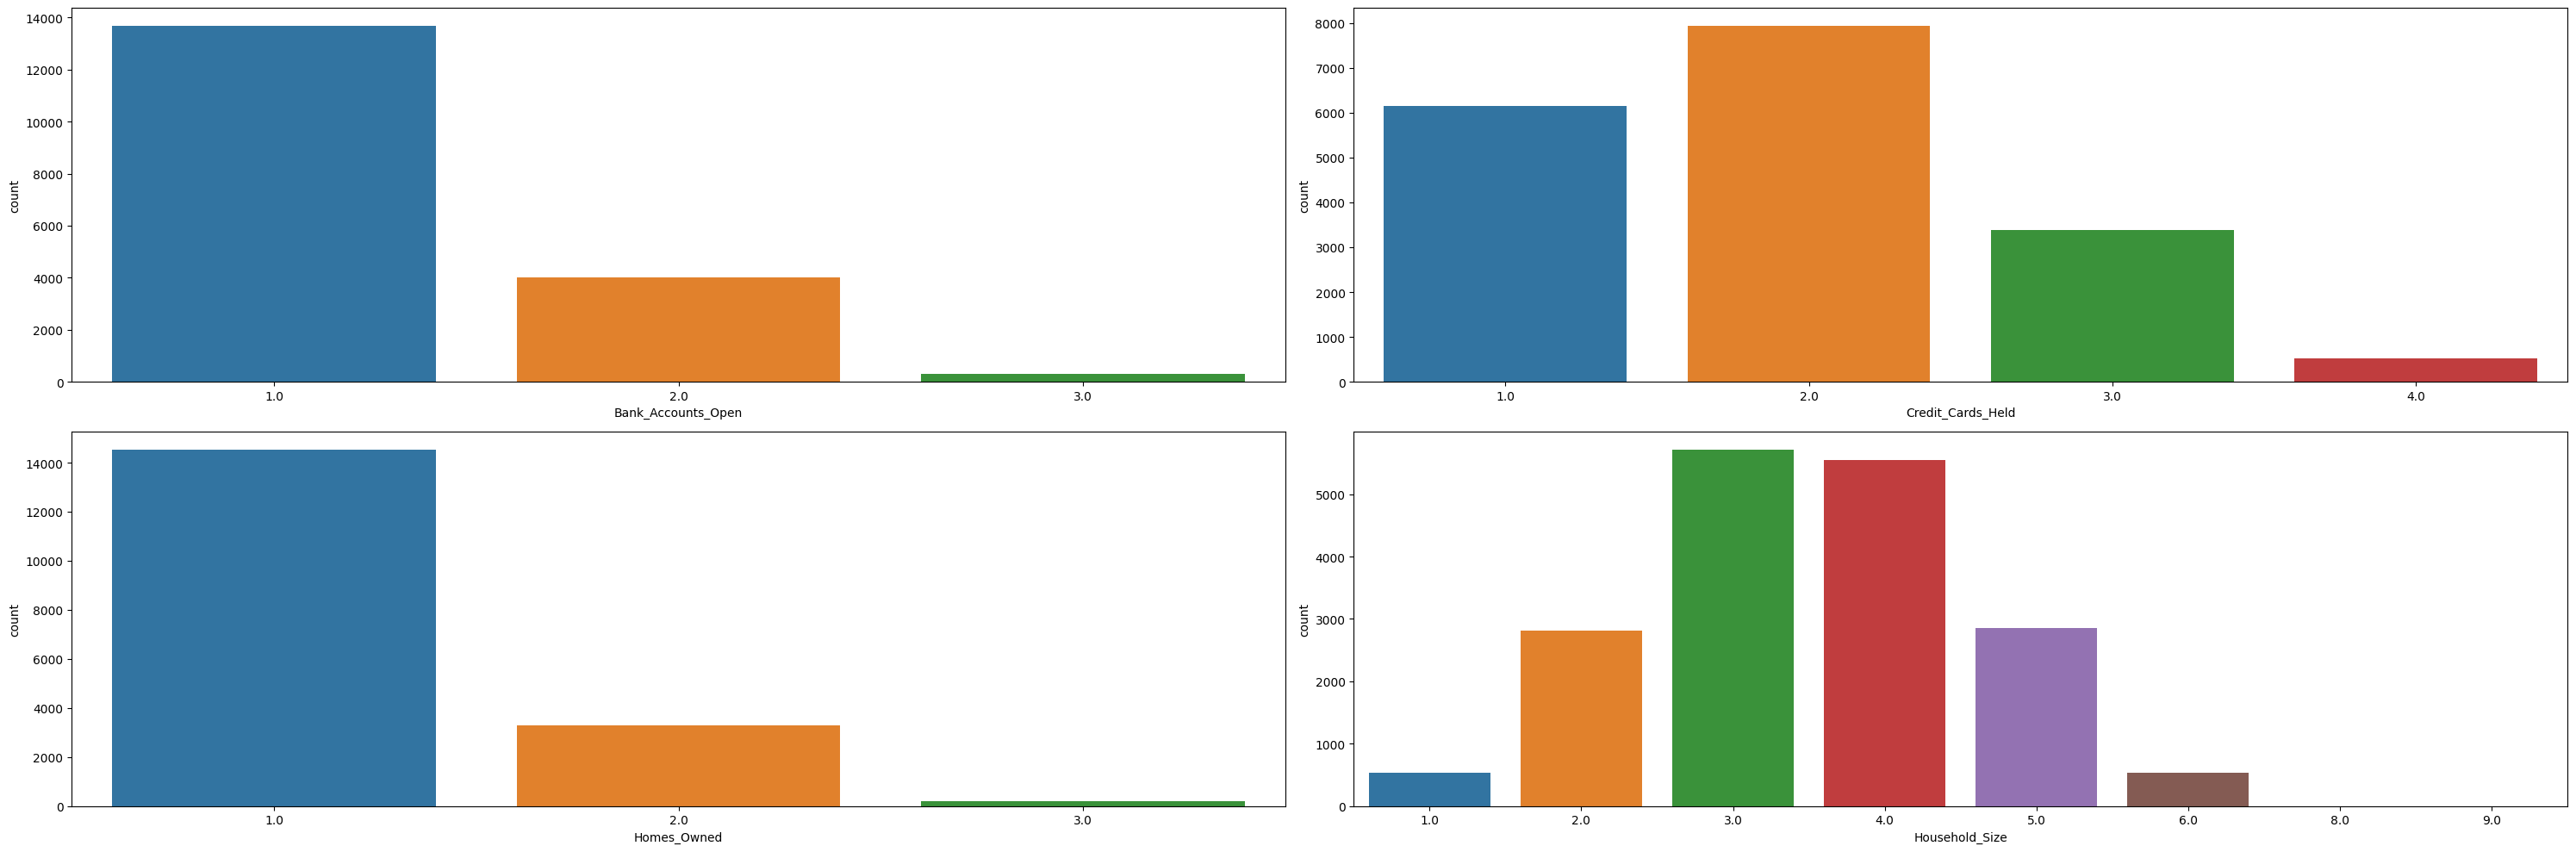

In [472]:
# Gráfico de distribución para cada variable numérica, pero categótricas
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df[["Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"]]

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df[colum], 
                ax = axes[i])

fig.tight_layout();

### Comprobamos si las variables tienen un orden o no

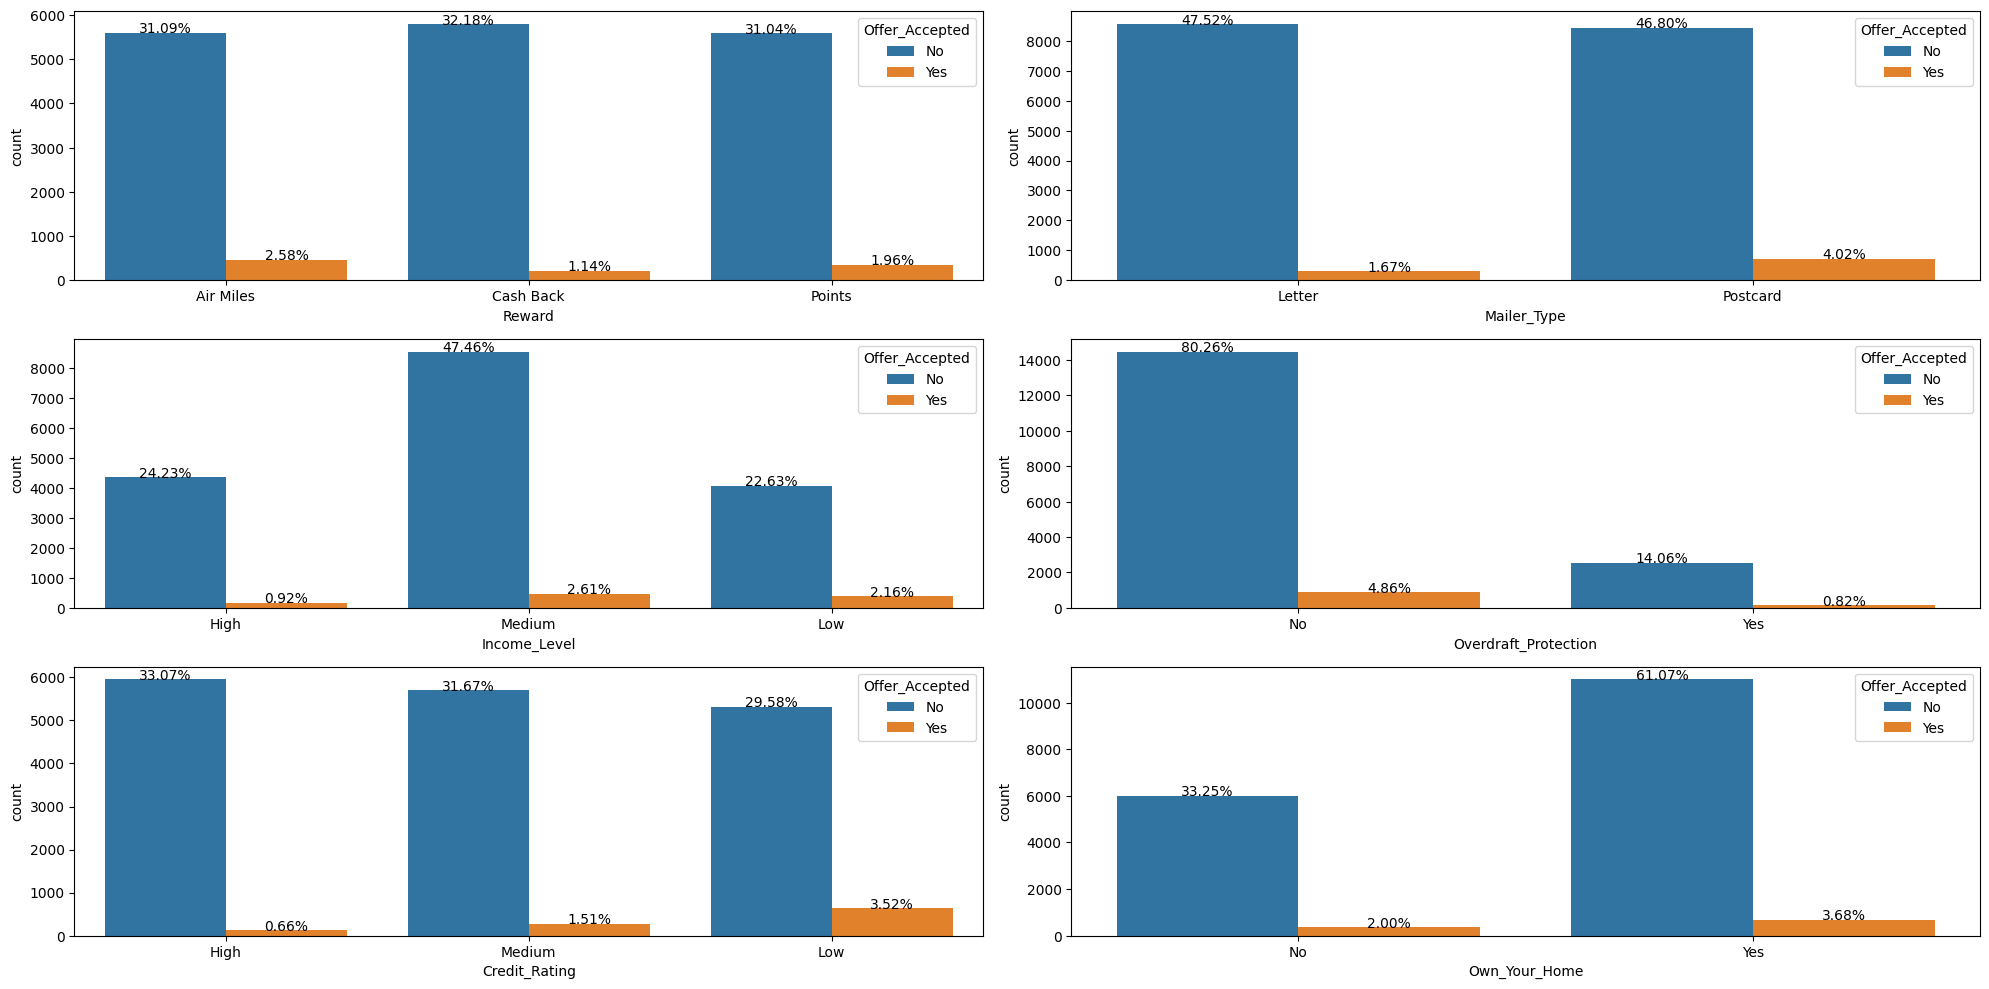

In [473]:
# Gráfico de relación entre variables no numéricas y la variable a predecir
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 10))

axes = axes.flat

columnas_numeric = df.drop(["Offer_Accepted"], axis=1).select_dtypes(include = "object")

for i, colum in enumerate(columnas_numeric):
    
    chart = sns.countplot(
                x = df[colum],
                hue= df["Offer_Accepted"],
                ax = axes[i])
    
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

fig.tight_layout();

### Vemos el ratio y la distribución de las variables no numéricas respecto a Offer Accepted, y si tienen un orden o no

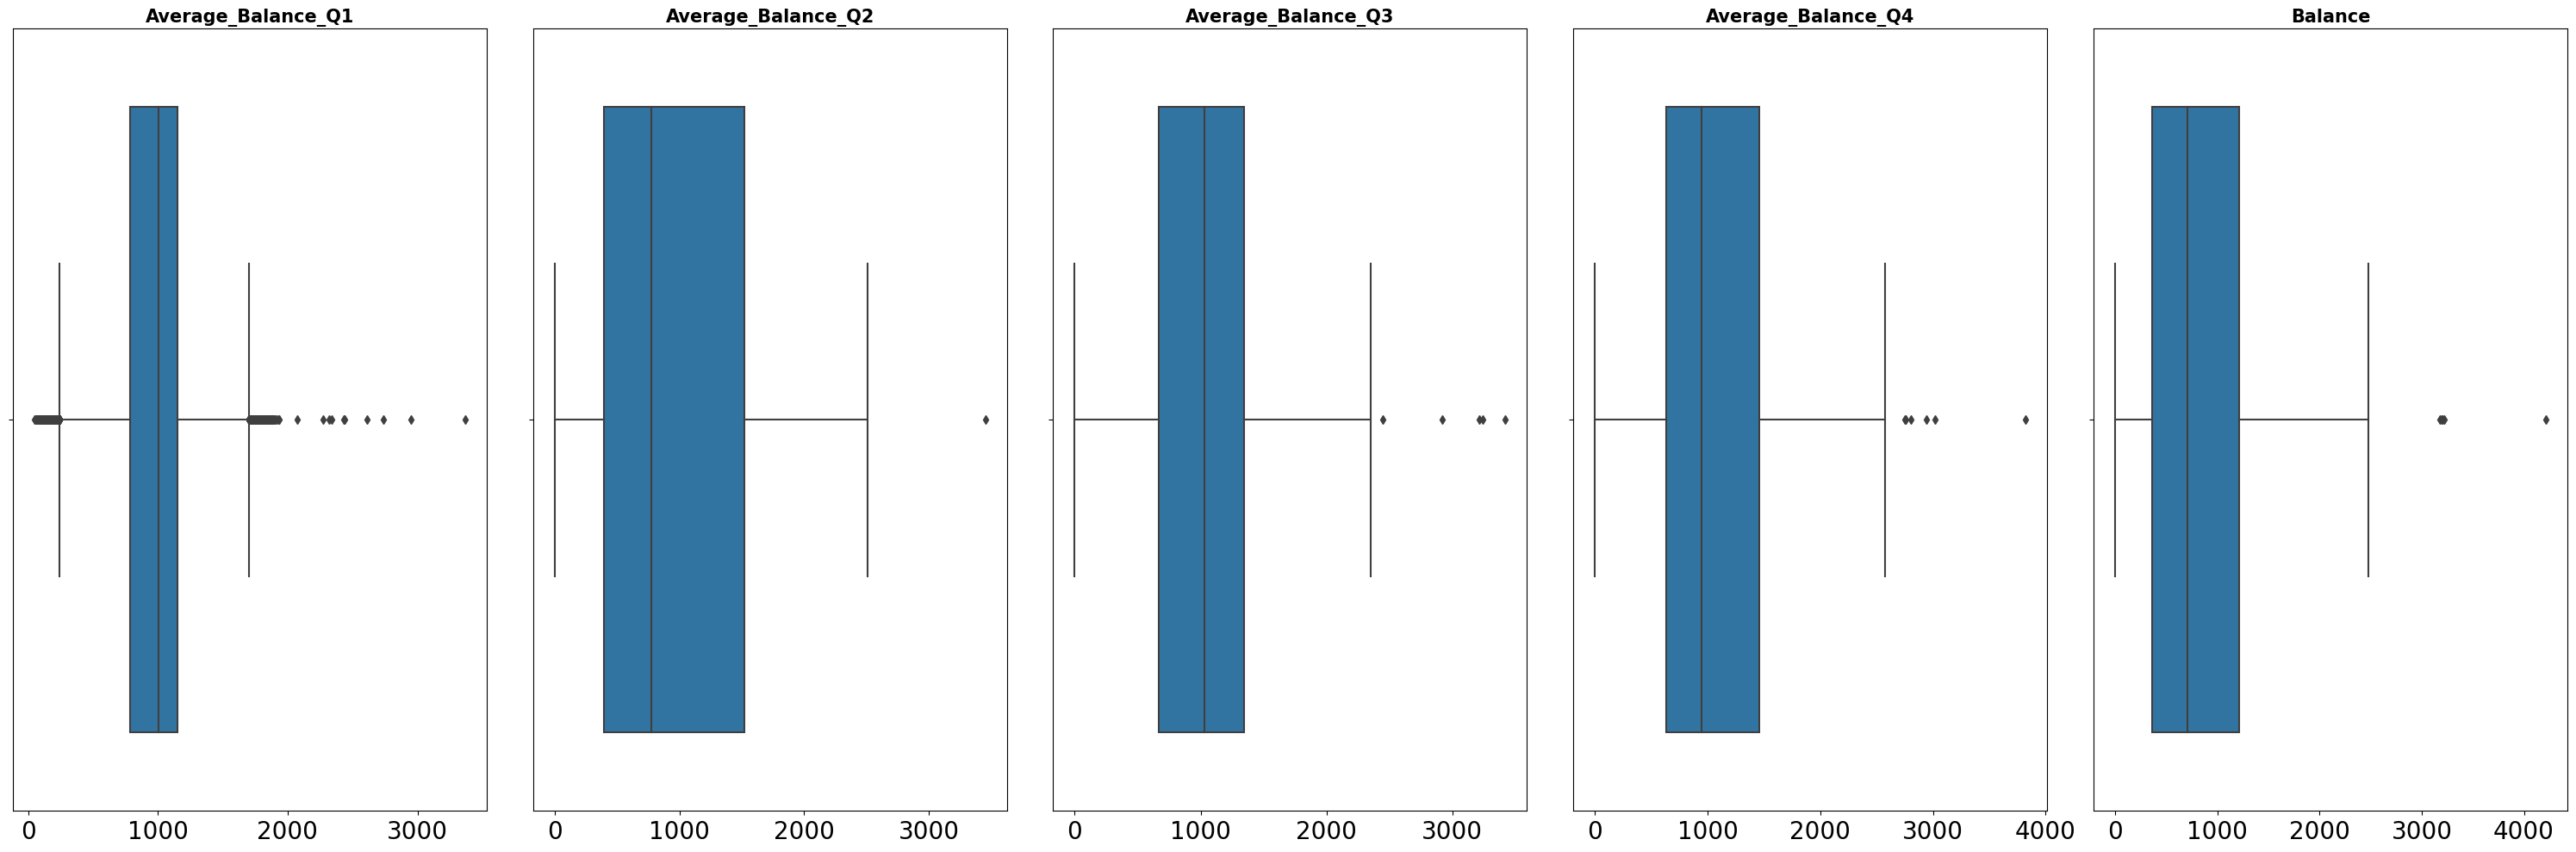

In [474]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.drop(["Customer_Number","Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.boxplot(
        data = df,
        x = colum,  
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

### Vemos que hay varios Outliers, luego veremos cómo los tratamos

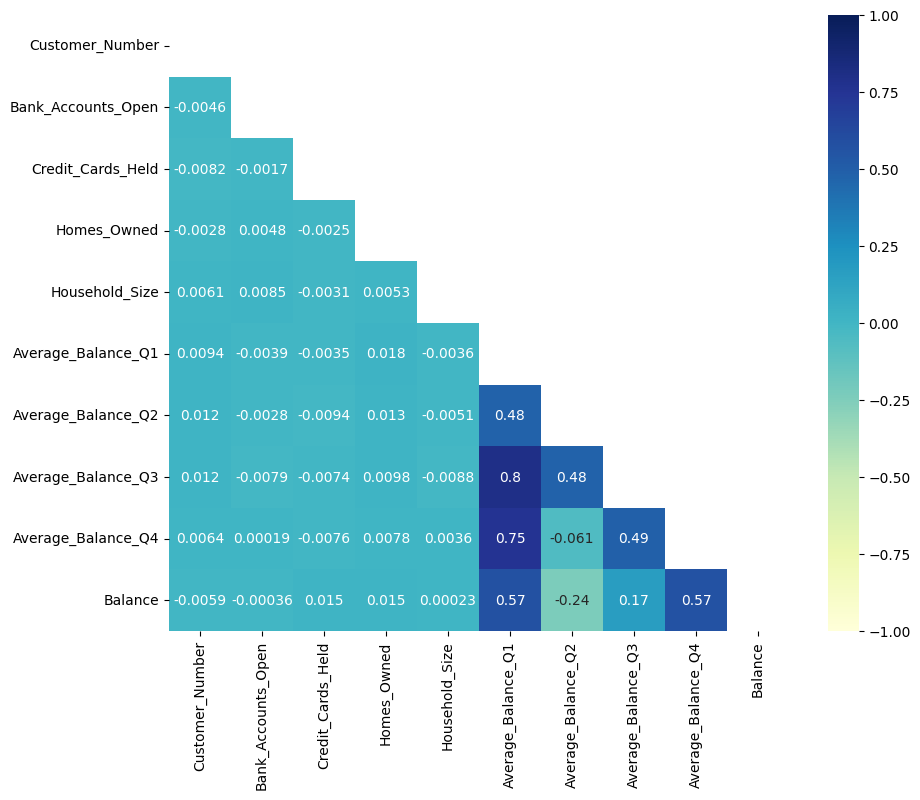

In [475]:
# Creamos una mask para visualizar mejor nuestra matriz de correlación de forma triangular
# ==============================================================================

mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin = -1,
           vmax= 1);

# 

### Como tenemos una variable respuesta con Si y No no se puede visualizar la correlación, y aun teniendo el encoding, con valores de 0 y 1 no se puede visualziar en éste gráfico si hay o no correlación entre variables predictoras y variable respuesta

# 3- Estandarización

In [476]:
# Nos hacemos una copia del dataframe
# ==============================================================================

df_RS= df.copy()

In [477]:
# Vamos a extraer de nuevo las columnas numéricas del df que no contiene nulos, excluyendo las variables discretas
# ==============================================================================

df_num = df.select_dtypes(include = np.number)
df_num.drop(['Customer_Number',"Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1, inplace=True)
columnas_num=df_num.columns
columnas_num

Index(['Average_Balance_Q1', 'Average_Balance_Q2', 'Average_Balance_Q3',
       'Average_Balance_Q4', 'Balance'],
      dtype='object')

In [478]:
# Estandarizamos las variables numéricas con Robust Scaler, ajustando el modelo con .fit y convirtiendo el array en un dataframe
# ==============================================================================

robust = RobustScaler()

robust.fit(df[columnas_num])

X_robust = robust.transform(df[columnas_num])

df_RS[columnas_num] = X_robust
df_RS.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Overdraft_Protection,Credit_Rating,Own_Your_Home,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,No,Air Miles,Letter,High,No,High,No,1.0,1.0,2.0,1.0,4.0,0.423037,0.794855,-0.228614,0.179735,0.351726
1,No,Air Miles,Letter,Medium,No,Medium,Yes,2.0,1.0,2.0,2.0,5.0,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938
2,No,Air Miles,Postcard,High,No,Medium,Yes,3.0,2.0,2.0,1.0,2.0,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294
3,No,Air Miles,Letter,Medium,No,High,No,4.0,2.0,1.0,1.0,4.0,0.582791,0.714127,1.073746,0.208685,-0.336382
4,No,Air Miles,Letter,Medium,No,Medium,Yes,5.0,1.0,2.0,1.0,6.0,0.560850,1.212686,0.479351,0.043426,-0.400118


# 4- Encoding

In [479]:
# Volvemos a hacermos una copia para probar nuestra función con dos columnas
# ==============================================================================

df2 = df.copy()
df2.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Overdraft_Protection,Credit_Rating,Own_Your_Home,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,No,Air Miles,Letter,High,No,High,No,1.0,1.0,2.0,1.0,4.0,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,No,Medium,Yes,2.0,1.0,2.0,2.0,5.0,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,No,Medium,Yes,3.0,2.0,2.0,1.0,2.0,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,No,High,No,4.0,2.0,1.0,1.0,4.0,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,No,Medium,Yes,5.0,1.0,2.0,1.0,6.0,1211.00,2140.0,1357.0,982.0,365.0


In [480]:
# Vamos a definir una función que nos aplique el método One Hot Encoder
# ==============================================================================

def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()

    for col in columnas:
    
        transformados = oh.fit_transform(dff[[col]]) # Ojo con los corchetes
        
        oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
        
        dff[oh_df.columns] = oh_df
        
        dff.drop(col, axis = 1, inplace = True)
    
    return dff

In [481]:
# Vamos a aplicar la función a nuestra copia del df y a las columnas categóricas que hemos detectado que no había un orden
# ==============================================================================

df2 = one_hot_encoder(df2, ['Reward', 'Mailer_Type', 'Credit_Rating'])
df2.head()

,Offer_Accepted,Income_Level,Overdraft_Protection,Own_Your_Home,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,...,Average_Balance_Q4,Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium
0,No,High,No,No,1.0,1.0,2.0,1.0,4.0,1160.75,...,1095.0,1002.0,1,0,0,1,0,1,0,0
1,No,Medium,No,Yes,2.0,1.0,2.0,2.0,5.0,147.25,...,78.0,366.0,1,0,0,1,0,0,0,1
2,No,High,No,Yes,3.0,2.0,2.0,1.0,2.0,276.50,...,145.0,242.0,1,0,0,0,1,0,0,1
3,No,Medium,No,No,4.0,2.0,1.0,1.0,4.0,1219.00,...,1119.0,419.0,1,0,0,1,0,1,0,0
4,No,Medium,No,Yes,5.0,1.0,2.0,1.0,6.0,1211.00,...,982.0,365.0,1,0,0,1,0,0,0,1


In [482]:
# Vamos a definir una función que nos prepare las variables que tienen orden, para codificar, 
# calcula los valores únicos de cada columna y devuelve un diccionario que contiene los valores únicos de cada columna. 
# ==============================================================================

def pre_ordinal_encoder(df, columns_to_encode):
    unique_values_dict = {}
    for column in columns_to_encode:
        value_counts = df[column].value_counts()
        unique_values = pd.DataFrame(value_counts).reset_index().sort_values(by=column)['index'].unique().tolist()
        unique_values_dict[column] = sorted(unique_values)
    return unique_values_dict

# Vamos a definir una función que nos aplique el método Ordinal Encoder
# ==============================================================================

def ordinal_encoder(df, columna, orden_valores):
    ordinal = OrdinalEncoder(categories = [orden_valores], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    oe_df = pd.DataFrame(transformados_oe)
    oe_df.columns = ordinal.feature_names_in_
    columna += "_oe"
    df[columna] = oe_df
    return df

In [483]:
# Definimos la la lista de columnas y aplicamos las dos funciones que hemos definido previamente
# ==============================================================================

columns_to_encode = ['Offer_Accepted','Income_Level', 'Bank_Accounts_Open', 'Overdraft_Protection', 'Credit_Cards_Held', 'Homes_Owned', 'Household_Size', 'Own_Your_Home']

orden1 = pre_ordinal_encoder(df2, columns_to_encode)

for columna in columns_to_encode:
    df2 = ordinal_encoder(df2, columna, orden1[columna])
df2.head()

,Offer_Accepted,Income_Level,Overdraft_Protection,Own_Your_Home,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,...,Credit_Rating_Low,Credit_Rating_Medium,Offer_Accepted_oe,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe
0,No,High,No,No,1.0,1.0,2.0,1.0,4.0,1160.75,...,0,0,0,0,0,0,1,0,3,0
1,No,Medium,No,Yes,2.0,1.0,2.0,2.0,5.0,147.25,...,0,1,0,2,0,0,1,1,4,1
2,No,High,No,Yes,3.0,2.0,2.0,1.0,2.0,276.50,...,0,1,0,0,1,0,1,0,1,1
3,No,Medium,No,No,4.0,2.0,1.0,1.0,4.0,1219.00,...,0,0,0,2,1,0,0,0,3,0
4,No,Medium,No,Yes,5.0,1.0,2.0,1.0,6.0,1211.00,...,0,1,0,2,0,0,1,0,5,1


In [484]:
# Nos quedamos solo con las variables del encoding
# ==============================================================================

encoded_df = df2.drop(df2.columns[:14], axis=1).copy()
encoded_df.head(2)

,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Offer_Accepted_oe,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe
0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,3,0
1,1,0,0,1,0,0,0,1,0,2,0,0,1,1,4,1


In [485]:
# Concatenamos el número del customer ya que nos sirve de index
# ==============================================================================

df_encoded = pd.concat([df2['Customer_Number'], encoded_df], axis=1)
df_encoded.head(2)

,Customer_Number,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Offer_Accepted_oe,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe
0,1.0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,3,0
1,2.0,1,0,0,1,0,0,0,1,0,2,0,0,1,1,4,1


# Balanceo de variables

In [486]:
# Definimos una función para que aplique tanto el downsampling como el upsampling
# ==============================================================================

def balanceo(df, variable, input):
    # Separamos en x e y
    X = df.drop(variable, axis=1)
    y = df[variable]
    
    # Chequea si el input es válido
    if input not in ['downsampling', 'upsampling']:
        print("Invalid input")
        return None
    
    # Selecciona el método según el imput
    if input == 'downsampling':
        sampler = RandomUnderSampler()
    else:
        sampler = RandomOverSampler()
        
    # Aplica el método 
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    
    return X_resampled, y_resampled

In [487]:
# Aplicamos el método y comprobamos con un value_counts para ver si todo está ok
# ==============================================================================

X, y = balanceo(df_encoded, 'Offer_Accepted_oe', 'upsampling')
y.value_counts()

0    16977
1    16977
Name: Offer_Accepted_oe, dtype: int64

In [488]:
# Concatenamos X e Y 
# ==============================================================================

df_up = pd.concat([X, y], axis = 1)
df_up.head(2)

,Customer_Number,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe,Offer_Accepted_oe
0,1.0,1,0,0,1,0,1,0,0,0,0,0,1,0,3,0,0
1,2.0,1,0,0,1,0,0,0,1,2,0,0,1,1,4,1,0


In [489]:
# Aplicamos el método y comprobamos con un value_counts para ver si todo está ok
# ==============================================================================

X, y = balanceo(df_encoded, 'Offer_Accepted_oe', 'downsampling')
y.value_counts()

0    1023
1    1023
Name: Offer_Accepted_oe, dtype: int64

In [490]:
# Concatenamos X e Y 
# ==============================================================================

df_down = pd.concat([X, y], axis = 1)
df_down.head(2)

,Customer_Number,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Income_Level_oe,Bank_Accounts_Open_oe,Overdraft_Protection_oe,Credit_Cards_Held_oe,Homes_Owned_oe,Household_Size_oe,Own_Your_Home_oe,Offer_Accepted_oe
0,1873.0,1,0,0,0,1,0,1,0,2,0,0,1,0,3,1,0
1,7188.0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0


# Ajuste del Modelo

In [556]:
# Reparto de datos en train y test. lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
# ==============================================================================


X = df_up.drop(["Customer_Number","Offer_Accepted_oe"], axis = 1)
y = df_up["Offer_Accepted_oe"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [548]:
# Probamos con el down también
# ==============================================================================

X = df_down.drop(["Customer_Number","Offer_Accepted_oe"], axis = 1)
y = df_down["Offer_Accepted_oe"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [557]:
y_test.value_counts()

1    3417
0    3374
Name: Offer_Accepted_oe, dtype: int64

In [558]:
y_train.value_counts()

0    13603
1    13560
Name: Offer_Accepted_oe, dtype: int64

In [559]:
# Iniciamos el método de Linear Regression. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta
# ==============================================================================

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [560]:
# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [561]:
# Vemos las diferencias entre el Real y el Predicho
# ==============================================================================

train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
results = pd.concat([train_df,test_df], axis = 0)
results.head()

,Real,Predicted,Set
17426,0,0,Train
21415,1,1,Train
24789,1,1,Train
985,0,0,Train
13243,0,1,Train


In [563]:
# Definimos la matriz de confusión
# ==============================================================================

def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
    mat_lr = confusion_matrix(clases_reales, clases_predichas)
    df = pd.DataFrame(mat_lr, columns = ["Offer No", "Offer Accepted"], index = ["No Offer", "Offer"])
    return df

In [564]:
# Aplicamos la matriz de confusion 
# ==============================================================================

matriz_logistica = matriz_confusion(y_test, y_pred_test, y_test.shape[0])
matriz_logistica

,Offer No,Offer Accepted
No Offer,2191,1183
Offer,937,2480


In [565]:
# Generamos una función para sacar todas las variables para medir la eficacia de nuestro modelo
# ==============================================================================

def metricas(real_test, pred_test, real_train, pred_train, modelo):
    
    # Test
    accuracy_test = accuracy_score(real_test, pred_test)
    precision_test = precision_score(real_test, pred_test)
    recall_test = recall_score(real_test, pred_test)
    f1_test = f1_score(real_test, pred_test)
    kappa_test = cohen_kappa_score(real_test, pred_test)

    # Train
    accuracy_train = accuracy_score(real_train, pred_train)
    precision_train = precision_score(real_train, pred_train)
    recall_train = recall_score(real_train, pred_train)
    f1_train = f1_score(real_train, pred_train)
    kappa_train = cohen_kappa_score(real_train, pred_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [574]:
# Comprobamos los resultados de nuestro modelo
# ==============================================================================

rl_result = metricas(y_test, y_pred_test, y_train, y_pred_train, "Regresión logistica")
rl_result

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.687822,0.677041,0.725783,0.700565,0.375333,test,Regresión logistica
1,0.683724,0.667295,0.730826,0.697617,0.367542,train,Regresión logistica


# Decision tree

In [567]:
# Iniciamos el método de Decission Tree. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta
# ==============================================================================

arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [572]:
# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [576]:
# Comprobamos los resultados de nuestro modelo
# ==============================================================================

dt_result = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
dt_result

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.884553,0.826432,0.975417,0.894765,0.768831,test,Decission Tree I
1,0.906601,0.853959,0.980605,0.912911,0.813245,train,Decission Tree I


In [583]:
# Comprobamos los features max y la profundidad de nuestro arbol
# ==============================================================================

max_features = np.sqrt(len(X_train.columns)) #MAX features
max_features, (arbol.tree_.max_depth)

(3.872983346207417, 20)

In [580]:
# Establecemos los parámetros de nuestro arbol
# ==============================================================================

param = {"max_depth": [1, 5, 10, 15, 20],
         "min_samples_split": [10, 50, 100],
         "max_features": [1,2,3,4],
         "min_samples_leaf": [10, 50, 100]}
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs=-1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [581]:
# Entrenamos el arbol y ajustamos el modelo con los parámetros de antes
# ==============================================================================

%%time
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
CPU times: total: 9.03 s
Wall time: 17.2 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [585]:
# Sacamos los mejores parámetros para obtener el mejor resultado posible
# ==============================================================================

arbol2.best_params_

{'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [604]:
# Aplicamos los mejores params
# ==============================================================================

arbol3 = DecisionTreeClassifier(max_depth= 20,
 max_features= 4,
 min_samples_leaf= 10,
 min_samples_split= 10)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=10,
                       min_samples_split=10)

In [605]:
# Vemos los resultados y comparamos
# ==============================================================================

y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

dt_result2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")

dt_all = pd.concat([dt_result, dt_result2], axis = 0)
dt_all

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.884553,0.826432,0.975417,0.894765,0.768831,test,Decission Tree I
1,0.906601,0.853959,0.980605,0.912911,0.813245,train,Decission Tree I
0,0.771462,0.731332,0.862745,0.791622,0.542382,test,Decission Tree II
1,0.794316,0.749234,0.883776,0.810963,0.588747,train,Decission Tree II


# Random Forest

In [591]:
# Iniciamos el método de Random Forest. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta
# ==============================================================================

bosque = GridSearchCV(
        estimator = RandomForestClassifier(), 
        param_grid = param, 
        n_jobs=-1,
        verbose = 1, 
        cv = 10)
bosque.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=1)

In [592]:
# Sacamos los mejores parámetros para obtener el mejor resultado posible
# ==============================================================================

bosque.best_params_

{'max_depth': 15,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [610]:
# Aplicamos los mejores params
# ==============================================================================

rfc=RandomForestClassifier(max_depth= 15,
 max_features= 4,
 min_samples_leaf= 10,
 min_samples_split= 10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=4, min_samples_leaf=10,
                       min_samples_split=10)

In [611]:
# Vemos los resultados y comparamos
# ==============================================================================

y_pred_rfc_test= rfc.predict(X_test)
y_pred_rfc_train= rfc.predict(X_train)

rf_result = metricas(y_test, y_pred_rfc_test, y_train, y_pred_rfc_train, "Random Forest")
df_almost = pd.concat([dt_all, rf_result], axis = 0)
df_almost

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.884553,0.826432,0.975417,0.894765,0.768831,test,Decission Tree I
1,0.906601,0.853959,0.980605,0.912911,0.813245,train,Decission Tree I
0,0.771462,0.731332,0.862745,0.791622,0.542382,test,Decission Tree II
1,0.794316,0.749234,0.883776,0.810963,0.588747,train,Decission Tree II
0,0.805478,0.768856,0.877085,0.819412,0.610591,test,Random Forest
1,0.821853,0.781377,0.892994,0.833465,0.643786,train,Random Forest


In [598]:
# Aplicamos la matriz de confusion 
# ==============================================================================

matriz_rf = matriz_confusion(y_test, y_pred_rfc_test, y_test.shape[0])
matriz_rf

,Offer No,Offer Accepted
No Offer,2460,914
Offer,411,3006


# Gradient

In [603]:
# Iniciamos el método de Gradient Boosting. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta
# ==============================================================================

grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, verbose=1)

In [606]:
# Sacamos los mejores parámetros para obtener el mejor resultado posible
# ==============================================================================

grid.best_params_

{'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [607]:
# Aplicamos los mejores params
# ==============================================================================

gbc = GradientBoostingClassifier(max_depth= 20,
 max_features= 4,
 min_samples_leaf= 10,
 min_samples_split= 10)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=20, max_features=4, min_samples_leaf=10,
                           min_samples_split=10)

In [612]:
# Vemos los resultados y comparamos
# ==============================================================================

y_pred_gb_test= gbc.predict(X_test)
y_pred_gb_train= gbc.predict(X_train)

gb_results = metricas(y_test, y_pred_gb_test, y_train, y_pred_gb_train, "Gradient")
df_all = pd.concat([df_almost, gb_results], axis = 0)
df_all

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.884553,0.826432,0.975417,0.894765,0.768831,test,Decission Tree I
1,0.906601,0.853959,0.980605,0.912911,0.813245,train,Decission Tree I
0,0.771462,0.731332,0.862745,0.791622,0.542382,test,Decission Tree II
1,0.794316,0.749234,0.883776,0.810963,0.588747,train,Decission Tree II
0,0.805478,0.768856,0.877085,0.819412,0.610591,test,Random Forest
1,0.821853,0.781377,0.892994,0.833465,0.643786,train,Random Forest
0,0.890296,0.834502,0.975417,0.899474,0.780347,test,Gradient
1,0.906417,0.853685,0.980605,0.912754,0.812877,train,Gradient


In [619]:
# Aplicamos la matriz de confusion 
# ==============================================================================

matriz_gb = matriz_confusion(y_test, y_pred_gb_test, y_test.shape[0])
matriz_gb

,Offer No,Offer Accepted
No Offer,2713,661
Offer,84,3333


# KNeighborsClassifier

In [614]:
# Iniciamos el método de KNeighbors
# ==============================================================================

knn_scores = []

for k in range(1,21):
    # por defecto nos devuelve la precisión
    score = cross_val_score(KNeighborsClassifier(n_neighbors = k),
                          X = X,
                          y = y,
                          cv=10, 
                         scoring = "precision")
    knn_scores.append(score.mean())

In [615]:
# Sacamos el numero de vecinos del modelo KNeighbors
# ==============================================================================

knn = pd.DataFrame(knn_scores, range(1,21)).reset_index()
knn.columns = ["number_neighbors", "score"]
knn.sort_values(by = "score", ascending = False).head(3)

,number_neighbors,score
1,2,0.932335
3,4,0.912208
2,3,0.907471


In [616]:
# # Aplicamos los mejores params de vecinos
# ==============================================================================

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [617]:
# Vemos los resultados y comparamos
# ==============================================================================

y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

knn_results = metricas(y_test, y_pred_knn_test, y_train, y_pred_knn_train, "KNN")
df_all = pd.concat([df_all, knn_results])
df_all

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.884553,0.826432,0.975417,0.894765,0.768831,test,Decission Tree I
1,0.906601,0.853959,0.980605,0.912911,0.813245,train,Decission Tree I
0,0.771462,0.731332,0.862745,0.791622,0.542382,test,Decission Tree II
1,0.794316,0.749234,0.883776,0.810963,0.588747,train,Decission Tree II
0,0.805478,0.768856,0.877085,0.819412,0.610591,test,Random Forest
1,0.821853,0.781377,0.892994,0.833465,0.643786,train,Random Forest
0,0.890296,0.834502,0.975417,0.899474,0.780347,test,Gradient
1,0.906417,0.853685,0.980605,0.912754,0.812877,train,Gradient
0,0.808570,0.843557,0.760609,0.799938,0.617365,test,KNN
1,0.834812,0.885658,0.768289,0.822809,0.669554,train,KNN


In [620]:
# Aplicamos la matriz de confusion 
# ==============================================================================

matriz_knn = matriz_confusion(y_test, y_pred_knn_test, y_test.shape[0])
matriz_knn

,Offer No,Offer Accepted
No Offer,2892,482
Offer,818,2599


### El modelo Gradient es con el que hemos obtenido las mejores métricas. Tiene el mejor accuracy de todos 0,9. La precision es la segunda mejor por debajo del Decission Tree I, el mejor recall empatado con el Decision Tree I, y el segundo mejor kappa también. Pero el Decision Tree I tiene una diferencia demasiado grande del test vs el train, lo que nos indica que ese modelo puede estar overfitted, por lo que nos decantamos finalmente por el Gradient.

In [625]:
# Guardamos el mejor modelo
# ==============================================================================

with open(f'datos/best_modelo_gb.pkl', 'wb') as modelo:
        pickle.dump(gbc, modelo)